## Getting Libraies and dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

In [4]:
# Load csv file in pandas dataframe
dataset=pd.read_csv('Dataset.csv')
dataset.head()

,Unnamed: 0,Time,Global Solar,Solar Altitude,Solar Azimuth,Solar Angle of Incidence,Solar Incident Solar,Solar Power Output,Solar Cell Temperature,Wind Speed,...,Battery Charge Power,Battery Discharge Power,Battery Input Power,Battery Energy Content,Battery State of Charge,Battery Energy Cost,AC Required Operating Capacity,DC Required Operating Capacity,AC Operating Capacity,DC Operating Capacity
0,0,2007-01-01 00:00:00,0.0,0.0,-6.78795,90.0,0.0,0.0,25.63279,4.805443,...,0.0,3.426379,-3.426379,174.7645,97.91775,0.0,3.987940,0.194916,0,72.07910
1,1,2007-01-01 01:00:00,0.0,0.0,-45.35176,90.0,0.0,0.0,25.63279,4.303294,...,0.0,3.486470,-3.486470,170.9829,95.79897,0.0,3.916542,0.130709,0,70.21818
2,2,2007-01-01 02:00:00,0.0,0.0,-60.21218,90.0,0.0,0.0,25.63279,2.636609,...,0.0,5.608804,-5.608804,164.8993,92.39043,0.0,5.861200,0.000000,0,68.40389
3,3,2007-01-01 03:00:00,0.0,0.0,-65.94936,90.0,0.0,0.0,25.63279,3.167456,...,0.0,7.018749,-7.018749,157.2864,88.12504,0.0,7.403273,0.032861,0,65.87334
4,4,2007-01-01 04:00:00,0.0,0.0,-68.03603,90.0,0.0,0.0,25.63279,4.522918,...,0.0,7.083129,-7.083129,149.6037,83.82053,0.0,7.714593,0.149628,0,62.93146


In [5]:
dataset.tail()

,Unnamed: 0,Time,Global Solar,Solar Altitude,Solar Azimuth,Solar Angle of Incidence,Solar Incident Solar,Solar Power Output,Solar Cell Temperature,Wind Speed,...,Battery Charge Power,Battery Discharge Power,Battery Input Power,Battery Energy Content,Battery State of Charge,Battery Energy Cost,AC Required Operating Capacity,DC Required Operating Capacity,AC Operating Capacity,DC Operating Capacity
8755,8755,2007-12-31 19:00:00,0.0,0.0,68.21178,90.0,0.0,0.0,25.52278,5.808934,...,0.0,4.946416,-4.946416,160.2542,89.78783,0.013742,6.134714,0.462062,0,67.06771
8756,8756,2007-12-31 20:00:00,0.0,0.0,67.63509,90.0,0.0,0.0,25.52278,5.503632,...,0.0,4.855119,-4.855119,154.9881,86.83732,0.013742,5.795235,0.345280,0,64.66561
8757,8757,2007-12-31 21:00:00,0.0,0.0,64.81570,90.0,0.0,0.0,25.52278,6.946388,...,0.0,2.218888,-2.218888,152.5814,85.48887,0.013742,4.468911,1.028791,0,63.92214
8758,8758,2007-12-31 22:00:00,0.0,0.0,57.46185,90.0,0.0,0.0,25.52278,6.045575,...,0.0,4.492436,-4.492436,147.7086,82.75876,0.013742,5.873334,0.563989,0,62.21089
8759,8759,2007-12-31 23:00:00,0.0,0.0,38.08067,90.0,0.0,0.0,25.52278,6.988419,...,0.0,1.339553,-1.339553,146.2557,81.94469,0.013742,3.602977,1.054136,0,61.09785


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8760 non-null   int64  
 1   Time                              8760 non-null   object 
 2   Global Solar                      8760 non-null   float64
 3   Solar Altitude                    8760 non-null   float64
 4   Solar Azimuth                     8760 non-null   float64
 5   Solar Angle of Incidence          8760 non-null   float64
 6   Solar Incident Solar              8760 non-null   float64
 7   Solar Power Output                8760 non-null   float64
 8   Solar Cell Temperature            8760 non-null   float64
 9   Wind Speed                        8760 non-null   float64
 10  Wind turbine Power Output         8760 non-null   float64
 11  Wind turbine Operating Status     8760 non-null   int64  
 12  Ambien

## Data Preprocessing

In [7]:
## Extracting Day, Months and Year
dataset['Year'] = dataset['Time'].apply(lambda x : re.search(r'^\d{4}',x).group(0)).astype(int)
dataset['Month'] = dataset['Time'].apply(lambda x : re.search(r'(?<=\-)\d{2}(?=\-)',x).group(0)).astype(int)
dataset['Day'] = dataset['Time'].apply(lambda x : re.search(r'(?<=\-)\d+(?=\s)',x).group(0)).astype(int)

In [8]:
## Extracting Hours, Minutes and Seconds
dataset['Hour'] = dataset['Time'].apply(lambda x: re.search(r"\b\d{2}(?=:)", x).group(0)).astype(int)
dataset['Minute'] = dataset['Time'].apply(lambda x: re.search(r"(?<=:)\d{2}(?=:)", x).group(0)).astype(int)
dataset['Second'] = dataset['Time'].apply(lambda x: re.search(r"(?<=:)\d{2}(?=:)", x).group(0)).astype(int)

In [9]:
dataset

,Unnamed: 0,Time,Global Solar,Solar Altitude,Solar Azimuth,Solar Angle of Incidence,Solar Incident Solar,Solar Power Output,Solar Cell Temperature,Wind Speed,...,AC Required Operating Capacity,DC Required Operating Capacity,AC Operating Capacity,DC Operating Capacity,Year,Month,Day,Hour,Minute,Second
0,0,2007-01-01 00:00:00,0.0,0.0,-6.78795,90.0,0.0,0.0,25.63279,4.805443,...,3.987940,0.194916,0,72.07910,2007,1,1,0,0,0
1,1,2007-01-01 01:00:00,0.0,0.0,-45.35176,90.0,0.0,0.0,25.63279,4.303294,...,3.916542,0.130709,0,70.21818,2007,1,1,1,0,0
2,2,2007-01-01 02:00:00,0.0,0.0,-60.21218,90.0,0.0,0.0,25.63279,2.636609,...,5.861200,0.000000,0,68.40389,2007,1,1,2,0,0
3,3,2007-01-01 03:00:00,0.0,0.0,-65.94936,90.0,0.0,0.0,25.63279,3.167456,...,7.403273,0.032861,0,65.87334,2007,1,1,3,0,0
4,4,2007-01-01 04:00:00,0.0,0.0,-68.03603,90.0,0.0,0.0,25.63279,4.522918,...,7.714593,0.149628,0,62.93146,2007,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,2007-12-31 19:00:00,0.0,0.0,68.21178,90.0,0.0,0.0,25.52278,5.808934,...,6.134714,0.462062,0,67.06771,2007,12,31,19,0,0
8756,8756,2007-12-31 20:00:00,0.0,0.0,67.63509,90.0,0.0,0.0,25.52278,5.503632,...,5.795235,0.345280,0,64.66561,2007,12,31,20,0,0
8757,8757,2007-12-31 21:00:00,0.0,0.0,64.81570,90.0,0.0,0.0,25.52278,6.946388,...,4.468911,1.028791,0,63.92214,2007,12,31,21,0,0
8758,8758,2007-12-31 22:00:00,0.0,0.0,57.46185,90.0,0.0,0.0,25.52278,6.045575,...,5.873334,0.563989,0,62.21089,2007,12,31,22,0,0


In [10]:
print(dataset['Year'].unique())
print(dataset['Month'].unique())
print(dataset['Day'].unique())

[2007]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [11]:
print(dataset['Hour'].unique())
print(dataset['Minute'].unique())
print(dataset['Second'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[0]
[0]


In [12]:
dataset=dataset.drop(['Unnamed: 0'],axis=1)
dataset=dataset.drop(['Time'],axis=1)

In [13]:
dataset.columns

Index(['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Incident Solar',
       'Solar Power Output', 'Solar Cell Temperature', 'Wind Speed',
       'Wind turbine Power Output', 'Wind turbine Operating Status',
       'Ambient Temperature', 'AC Primary Load', 'AC Primary Load Served',
       'Autosize Genset Power Output', 'Autosize Genset Operating Status',
       'Autosize Genset Fuel', 'Total Electrical Load Served',
       'Renewable Penetration', 'Excess Electrical Production',
       'Unmet Electrical Load', 'Total Renewable Power Output',
       'Inverter Power Input', 'Inverter Power Output',
       'Rectifier Power Input', 'Rectifier Power Output',
       'Battery Maximum Charge Power', 'Battery Maximum Discharge Power',
       'Battery Charge Power', 'Battery Discharge Power',
       'Battery Input Power', 'Battery Energy Content',
       'Battery State of Charge', 'Battery Energy Cost',
       'AC Required Operating Capacity', 'DC 

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Global Solar                      8760 non-null   float64
 1   Solar Altitude                    8760 non-null   float64
 2   Solar Azimuth                     8760 non-null   float64
 3   Solar Angle of Incidence          8760 non-null   float64
 4   Solar Incident Solar              8760 non-null   float64
 5   Solar Power Output                8760 non-null   float64
 6   Solar Cell Temperature            8760 non-null   float64
 7   Wind Speed                        8760 non-null   float64
 8   Wind turbine Power Output         8760 non-null   float64
 9   Wind turbine Operating Status     8760 non-null   int64  
 10  Ambient Temperature               8760 non-null   float64
 11  AC Primary Load                   8760 non-null   float64
 12  AC Pri

## Visualization

<Axes: >

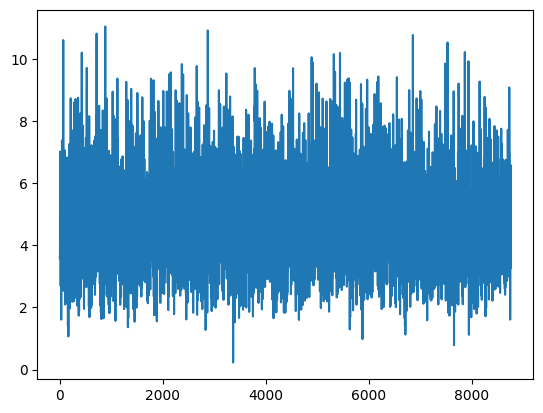

In [15]:
dataset['Total Electrical Load Served'].plot()

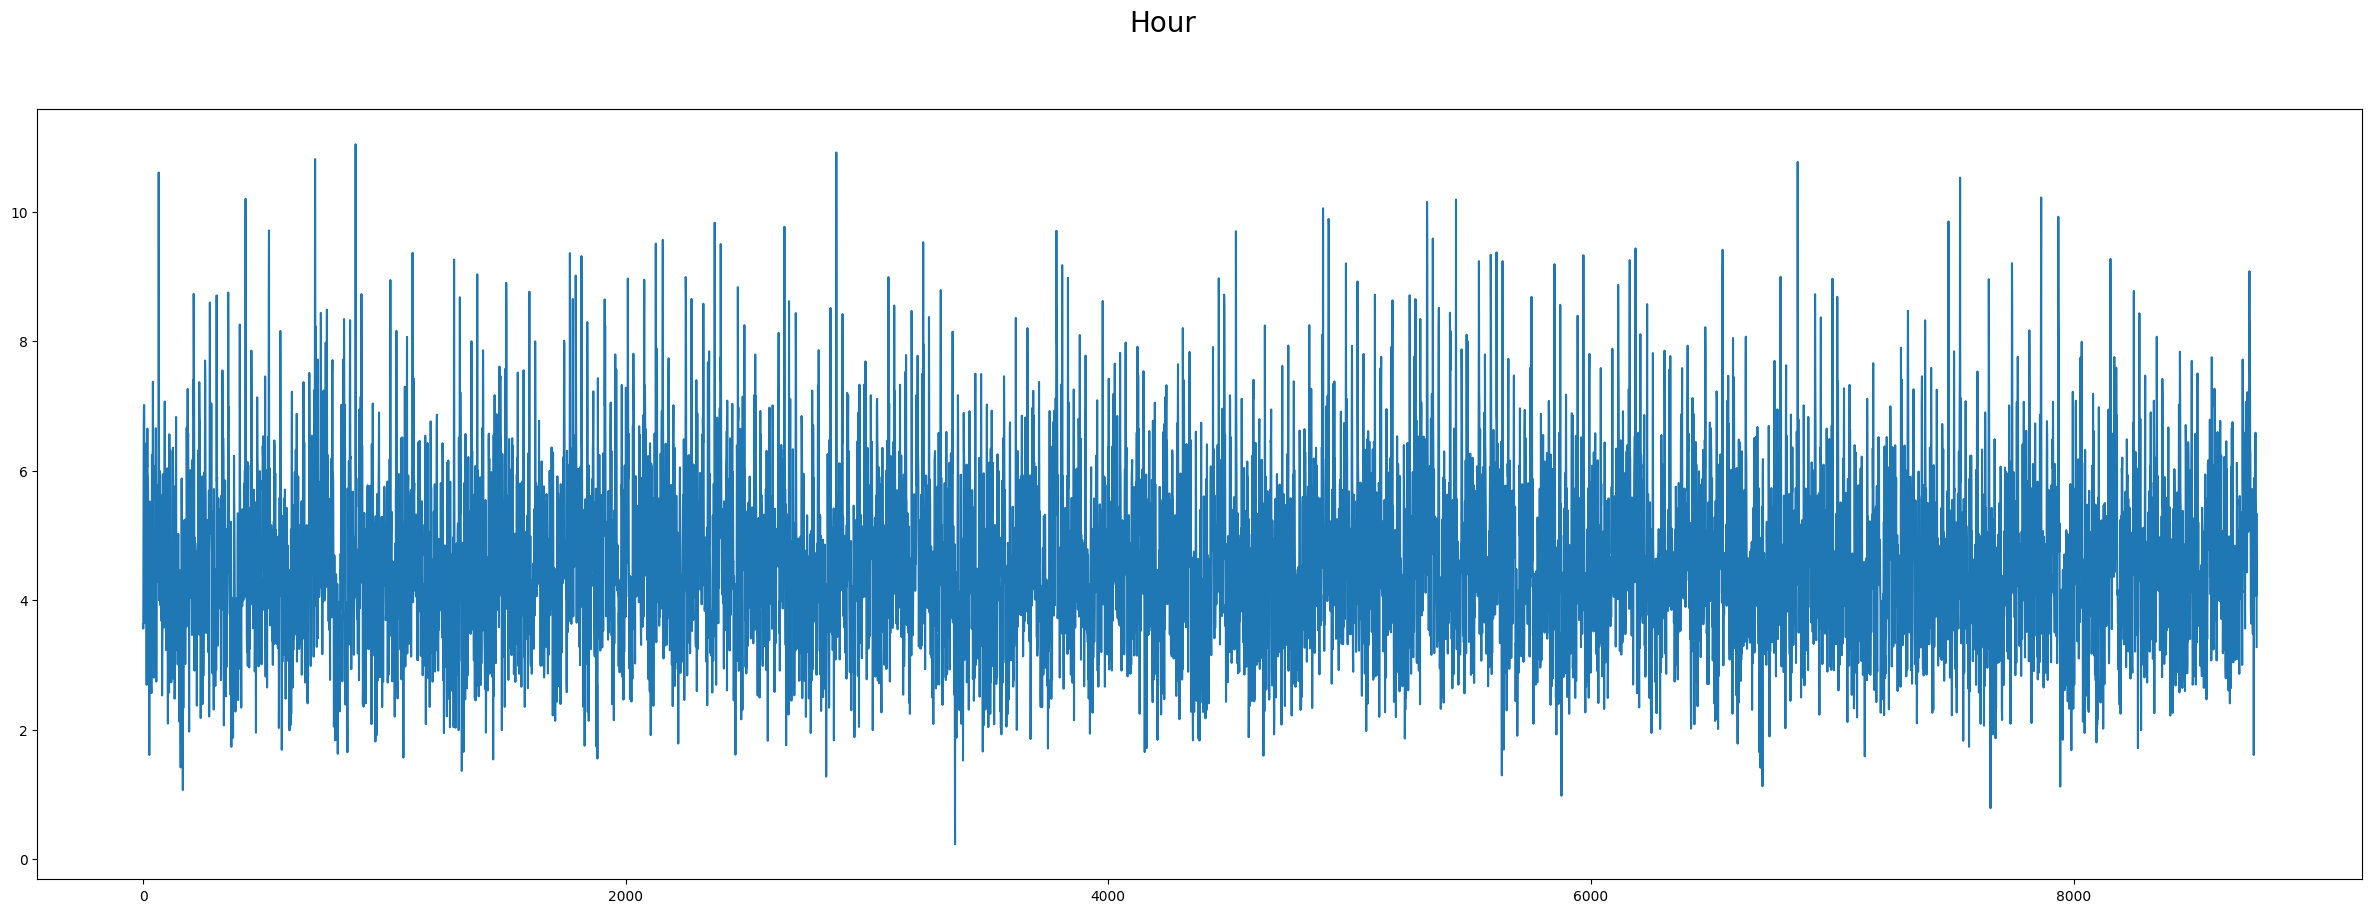

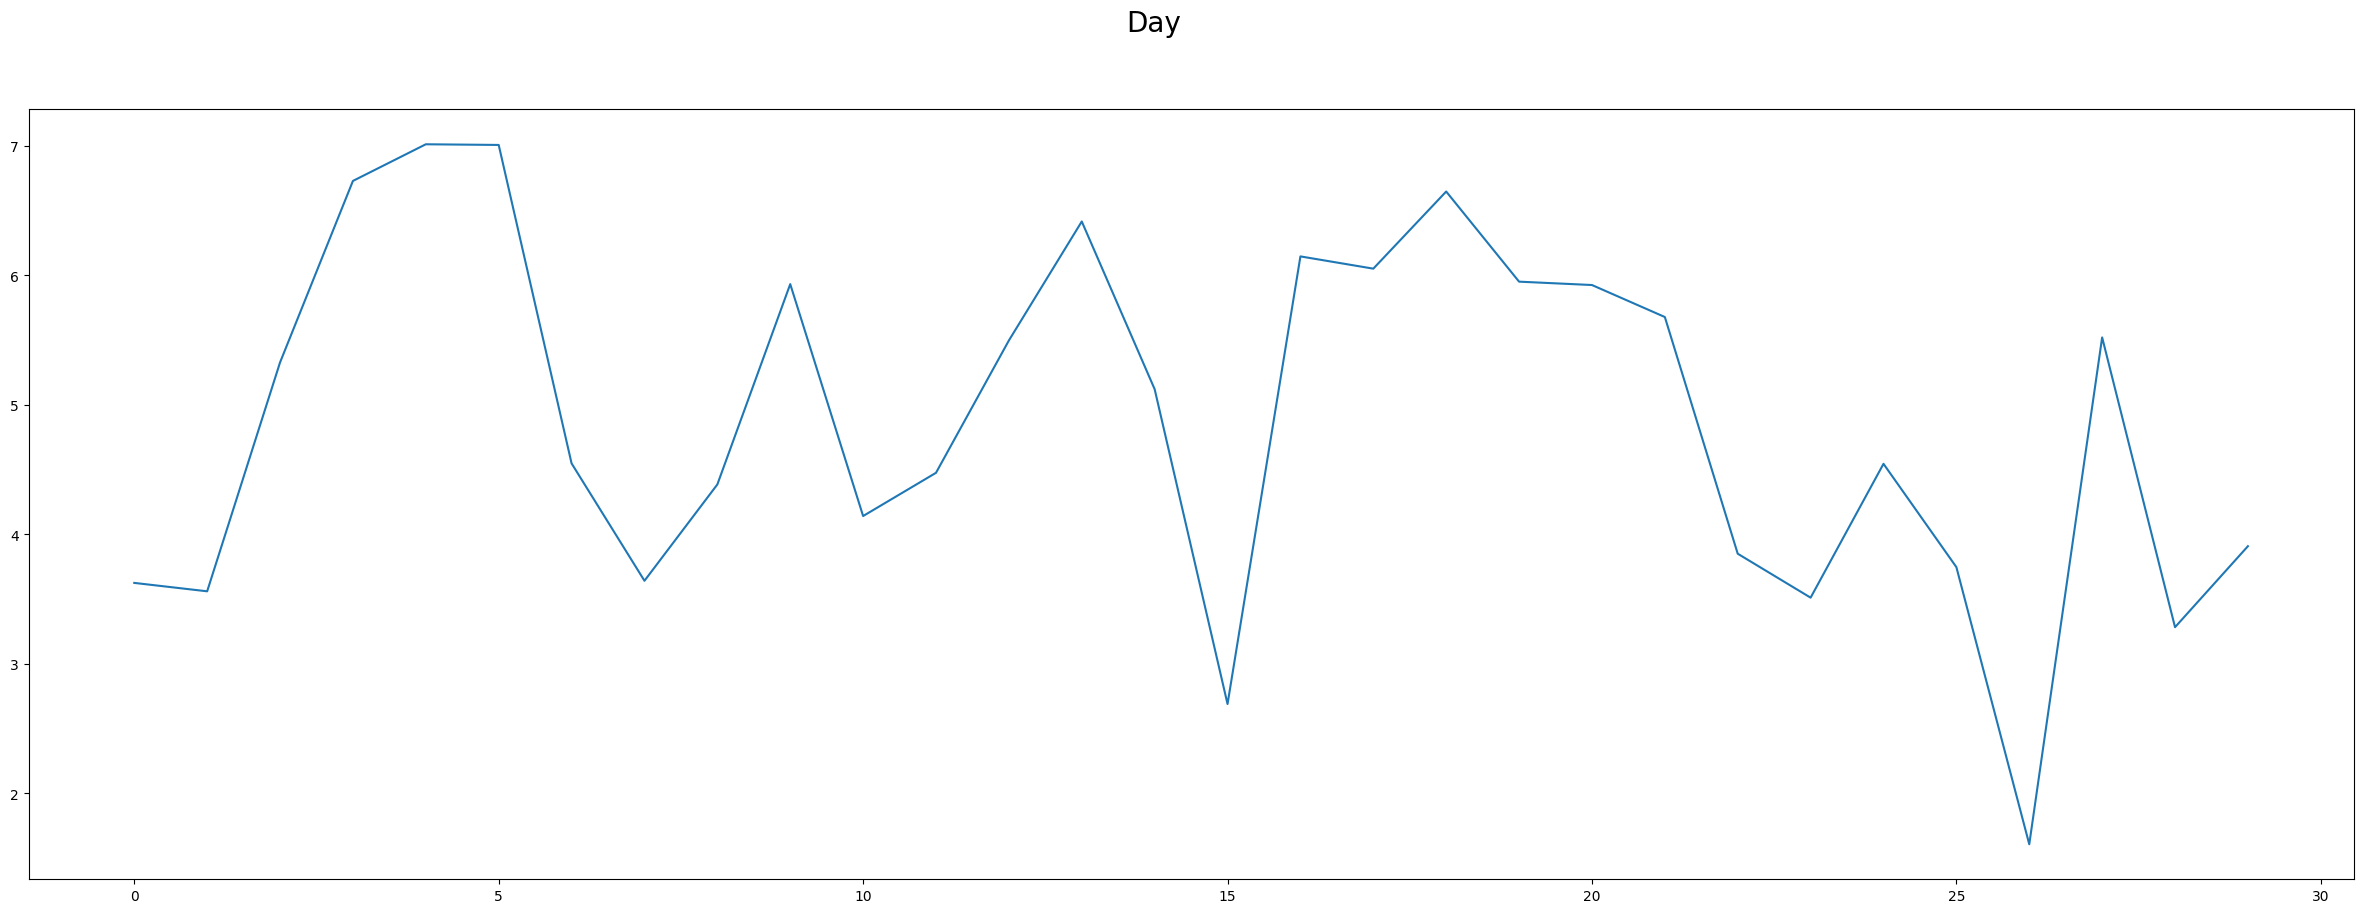

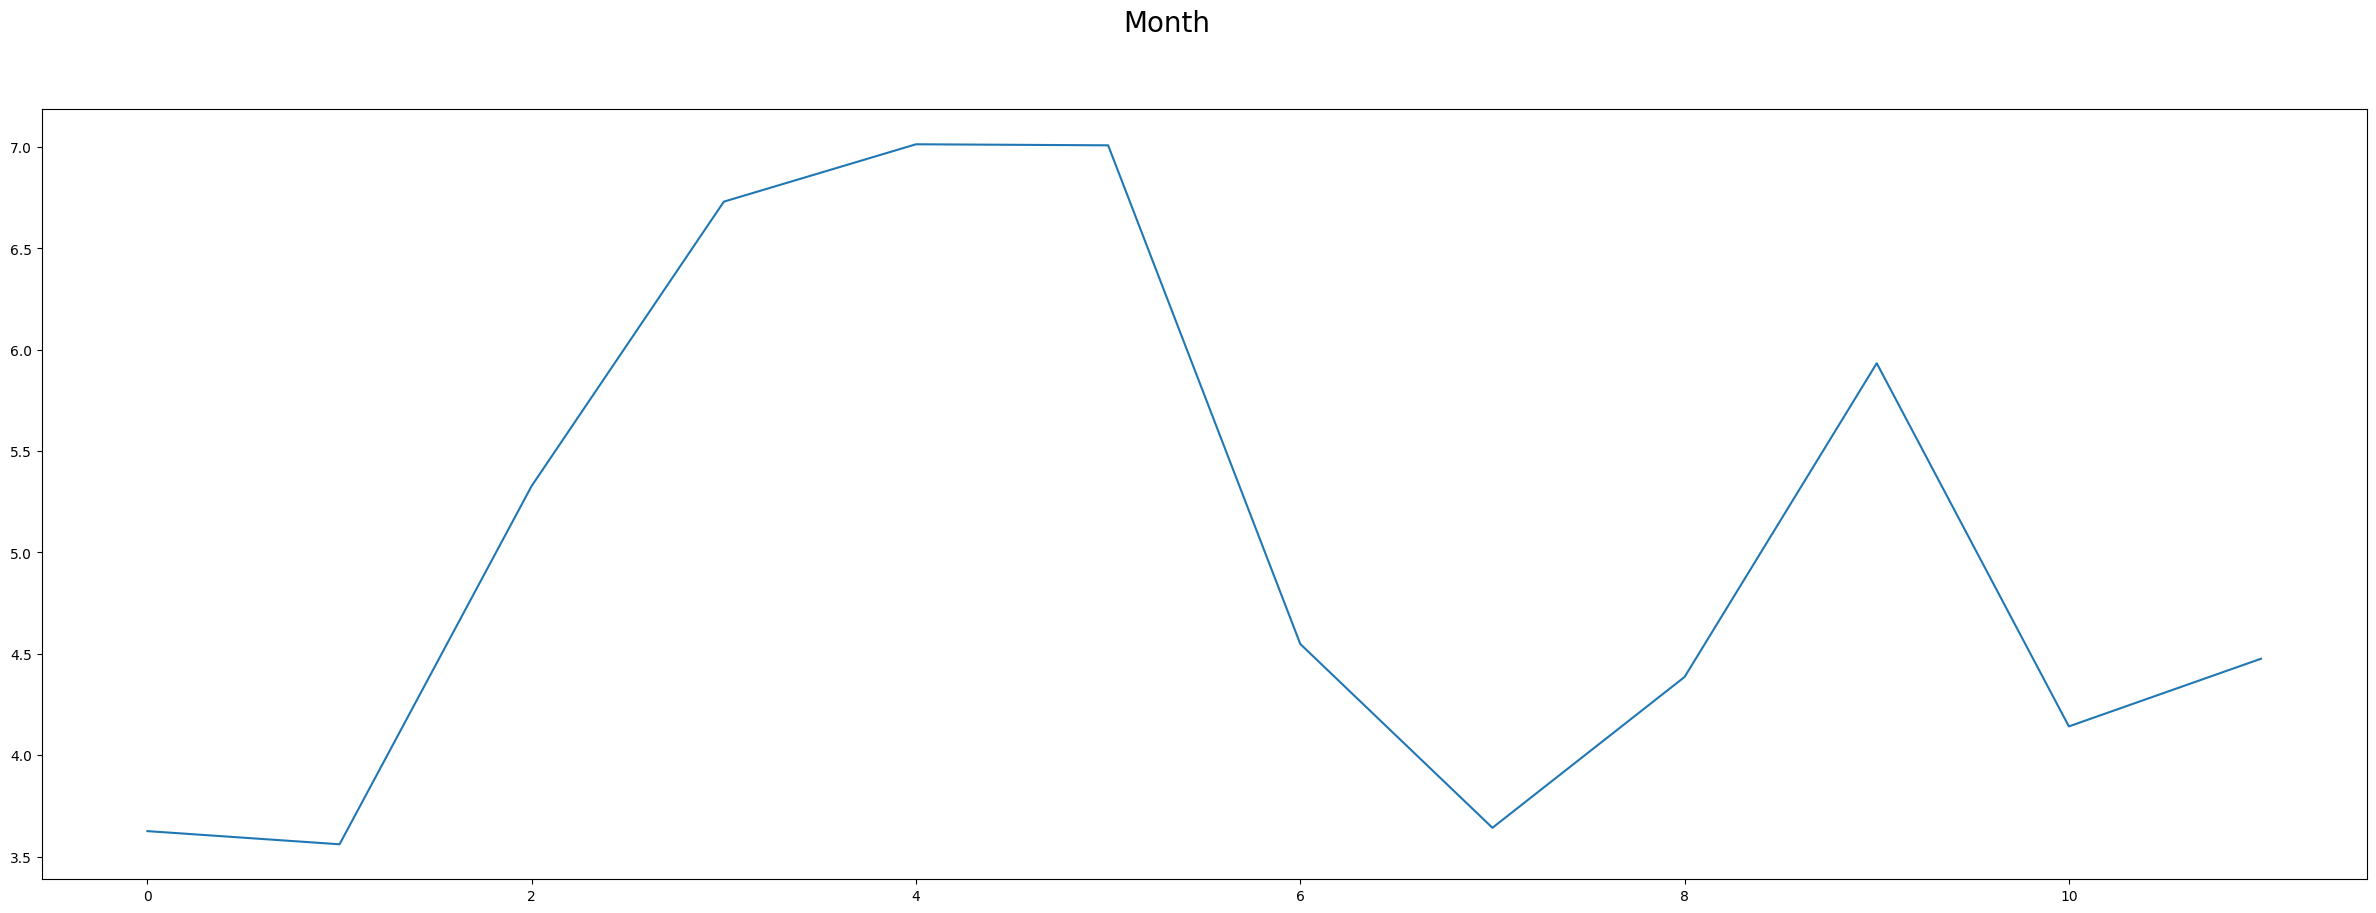

In [16]:
# Plot the data 

# Hourly
plt.figure(figsize=(30,10)).suptitle('Hour', fontsize=20)
plt.plot(dataset['Total Electrical Load Served'])
plt.show()

# Daily
plt.figure(figsize=(30,10)).suptitle('Day', fontsize=20)
plt.plot(dataset['Total Electrical Load Served'].head(30))
plt.show()

# Monthly 
plt.figure(figsize=(30,10)).suptitle('Month', fontsize=20)
plt.plot(dataset['Total Electrical Load Served'].head(12))
plt.show()

## Feature Engineering

In [17]:
selected_features_names = ['AC Primary Load', 'AC Primary Load Served',
       'Total Electrical Load Served','Unmet Electrical Load', 'Year','Hour','Minute','Month','Day',]
load_dataset=dataset[selected_features_names]
load_dataset.head()

,AC Primary Load,AC Primary Load Served,Total Electrical Load Served,Unmet Electrical Load,Year,Hour,Minute,Month,Day
0,3.625400,3.625400,3.625400,4.440890e-16,2007,0,0,1,1
1,3.560493,3.560493,3.560493,0.000000e+00,2007,1,0,1,1
2,5.328364,5.328364,5.328364,0.000000e+00,2007,2,0,1,1
3,6.730248,6.730248,6.730248,8.881780e-16,2007,3,0,1,1
4,7.013267,7.013267,7.013267,0.000000e+00,2007,4,0,1,1


AC Primary Load , ac primary load served ,unmet electrical load, year, hour, month, minute, day

## Splitting data into features and labels

In [18]:
x = load_dataset.drop(['Total Electrical Load Served'], axis =1).values
y = load_dataset['Total Electrical Load Served']
y

0       3.625400
1       3.560493
2       5.328364
3       6.730248
4       7.013267
          ...   
8755    5.577013
8756    5.268395
8757    4.062646
8758    5.339394
8759    3.275434
Name: Total Electrical Load Served, Length: 8760, dtype: float64

## Standardizing the data

In [19]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [20]:
standardized_x = scaler.transform(x)
standardized_x

array([[-0.73061156, -0.73061156,  0.73632467, ...,  0.        ,
        -1.60274527, -1.67350325],
       [-0.78011584, -0.78011584, -0.52079546, ...,  0.        ,
        -1.60274527, -1.67350325],
       [ 0.56823162,  0.56823162, -0.52079546, ...,  0.        ,
        -1.60274527, -1.67350325],
       ...,
       [-0.39712595, -0.39712595, -0.52079546, ...,  0.        ,
         1.58764752,  1.73704218],
       [ 0.57664416,  0.57664416, -0.52079546, ...,  0.        ,
         1.58764752,  1.73704218],
       [-0.99752909, -0.99752909, -0.52079546, ...,  0.        ,
         1.58764752,  1.73704218]])

In [21]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7
0,3.625400,3.625400,4.440890e-16,2007.0,0.0,0.0,1.0,1.0
1,3.560493,3.560493,0.000000e+00,2007.0,1.0,0.0,1.0,1.0
2,5.328364,5.328364,0.000000e+00,2007.0,2.0,0.0,1.0,1.0
3,6.730248,6.730248,8.881780e-16,2007.0,3.0,0.0,1.0,1.0
4,7.013267,7.013267,0.000000e+00,2007.0,4.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
8755,5.577013,5.577013,1.776360e-15,2007.0,19.0,0.0,12.0,31.0
8756,5.268395,5.268395,8.881780e-16,2007.0,20.0,0.0,12.0,31.0
8757,4.062646,4.062646,0.000000e+00,2007.0,21.0,0.0,12.0,31.0
8758,5.339394,5.339394,0.000000e+00,2007.0,22.0,0.0,12.0,31.0


In [22]:
x = standardized_x
y = dataset['Total Electrical Load Served']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.1, random_state=42)
print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(8760, 8) (7884, 8) (876, 8)
(8760,) (7884,) (876,)


## Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x_train,y_train)

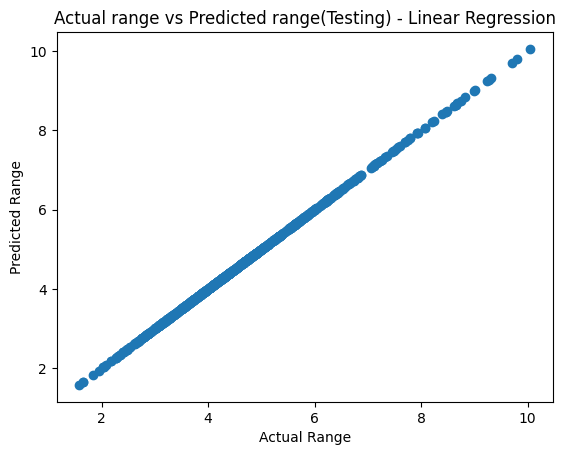

In [25]:
testing_data_prediction=reg.predict(x_test)
plt.scatter(y_test,testing_data_prediction)
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(Testing) - Linear Regression")
plt.show()

In [26]:
mae = mean_absolute_error(y_test,testing_data_prediction)
mae

8.542126924627346e-17

## Decision Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

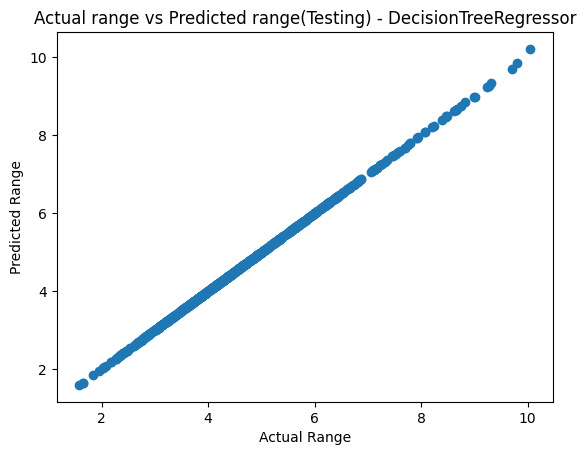

In [28]:
testing_data_prediction1=tree_reg.predict(x_test)
plt.scatter(y_test,testing_data_prediction1)
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(Testing) - DecisionTreeRegressor")
plt.show()

In [29]:
testing_data_prediction3=tree_reg.predict(x_test)
mae1 = mean_absolute_error(y_test,testing_data_prediction3)
mae1

0.0011176244292237382

## RandomForestRegressor

In [66]:
from sklearn.linear_model import ElasticNet
en_model = ElasticNet(alpha=1)
en_model.fit(x_train,y_train)

ElasticNet(alpha=1)

In [67]:
en_model.score(x_train,y_train)

0.7426141809415814

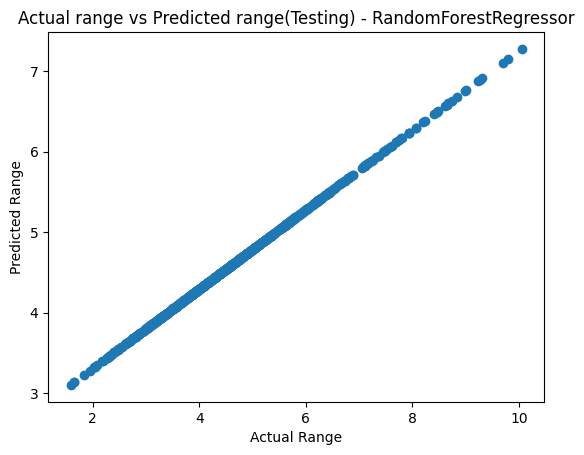

In [68]:
testing_data_prediction2=en_model.predict(x_test)
plt.scatter(y_test,testing_data_prediction2)
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(Testing) - RandomForestRegressor")
plt.show()

In [69]:
mae2 = mean_absolute_error(y_test,testing_data_prediction1)
mae2

0.0011176244292237382

## XGB regressor

In [33]:
# Load the model
xgb_model = XGBRegressor()

# Fit our training data into the model
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

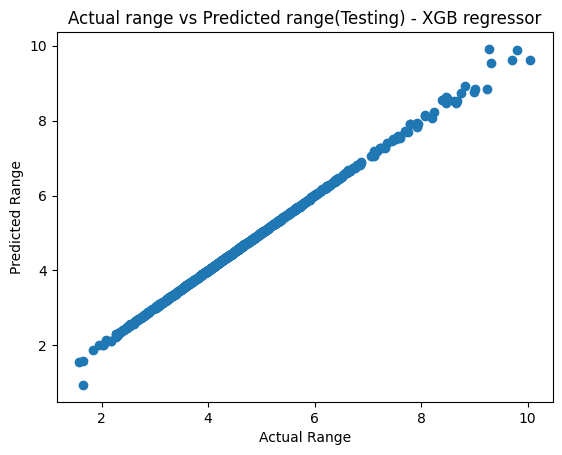

In [34]:
testing_data_predictions=xgb_model.predict(x_test)
plt.scatter(y_test,testing_data_predictions)
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(Testing) - XGB regressor")
plt.show()

In [70]:
y_pred_lineareregression = reg.predict(x_test)
y_pred_decisiontreeregressor = tree_reg.predict(x_test)
y_pred_elasticnetmodel = en_model.predict(x_test)
y_pred_xgbregressor = xgb_model.predict(x_test)

In [71]:
LinearRegression_Accuracy = reg.score(x_test,y_test)
DecisionTreeRegressor_Accuracy = tree_reg.score(x_test, y_test)
ElasticNetModel_Accuracy = en_model.score(x_test,y_test)
XGBoost_Accuracy = xgb_model.score(x_test,y_test)

Text(0, 0.5, 'Accuracy')

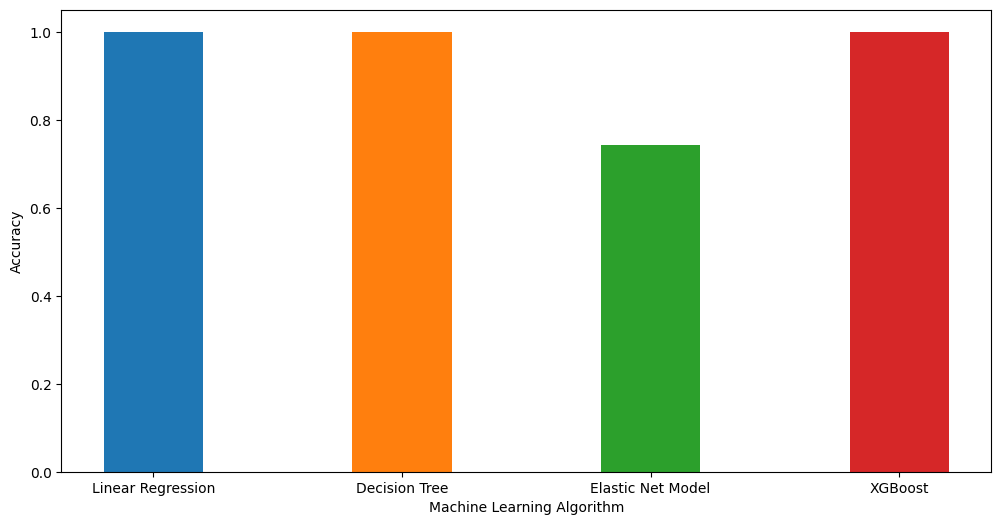

In [74]:
plt.figure(figsize=(12, 6))
plt.bar("Linear Regression",LinearRegression_Accuracy,width=0.4)
plt.bar("Decision Tree",DecisionTreeRegressor_Accuracy,width=0.4)
plt.bar("Elastic Net Model",ElasticNetModel_Accuracy,width=0.4)
plt.bar("XGBoost",XGBoost_Accuracy,width=0.4)
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Accuracy")

## Model Evaluation

In [36]:
# Prediction on training data

training_data_pred = rnd_search.predict(x_train)

#R2 score on training data
score_1 = metrics.r2_score(y_train, training_data_pred)

# Mean absolute error 
mae2= metrics.mean_absolute_error(y_train, training_data_pred)

print('R2 score on training data : ',score_1)
print('Mean absolute error on training data : ',mae2)

R2 score on training data :  0.9999900928666426
Mean absolute error on training data :  0.0003451216109440009


In [38]:
# Prediction on test data

test_data_pred = rnd_search.predict(x_test)

#R2 score on test data
score_2 = metrics.r2_score(y_test, test_data_pred)

# Mean absolute error 
mae3 = metrics.mean_absolute_error(y_test, test_data_pred)

print('R2 score on test data : ',score_2)
print('Mean absolute error on test data : ',mae3)

R2 score on test data :  0.9999968277049859
Mean absolute error on test data :  0.0006631978258613186


## Load Forecasting

In [40]:
input_data = (3.560493, 3.560493, 0.000000e+00, 2007, 1, 0,	1, 1)
#Changing the input into numpy array and reshaping
input_changed=np.array(input_data).reshape(1,-1)

#Standardize the input
std_input = scaler.transform(input_changed)

prediction = xgb_model.predict(std_input)
print(prediction)

print('Predicted load forecast : ', prediction)

[3.5640287]
Predicted load forecast :  [3.5640287]


## Saving the file

In [75]:
import pickle
#open a file, where you want to store the data
file = open('Load_Forecasting_model.pkl','wb')

#dump information to that file
pickle.dump(xgb_model, file)

AC Primary Load , ac primary load served ,unmet electrical load, year, hour, month, minute, day